# Sentiment analysis

In [1]:
import pandas as pd

df = pd.read_csv("Reviews.csv")

df.shape
df.columns
df.head()


c:\Users\shah4\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
df = df[['Score', 'Text']].dropna() # we need to analyse score n text only so we only keep the relevant columns here.

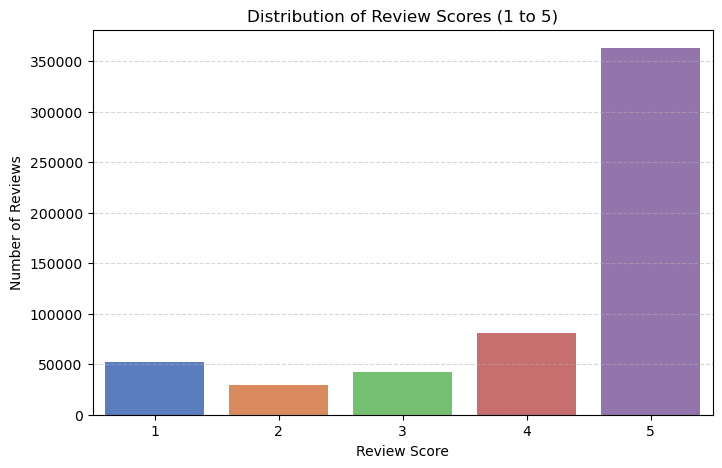

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of raw review scores
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=df, palette='muted')
plt.title("Distribution of Review Scores (1 to 5)")
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [4]:
print(df['Score'].value_counts(normalize=True).sort_index() * 100)

Score
1     9.194763
2     5.236835
3     7.501047
4    14.188483
5    63.878871
Name: proportion, dtype: float64


In [5]:
def label_sentiment(score):
    if score in [4, 5]:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['Score'].apply(label_sentiment)

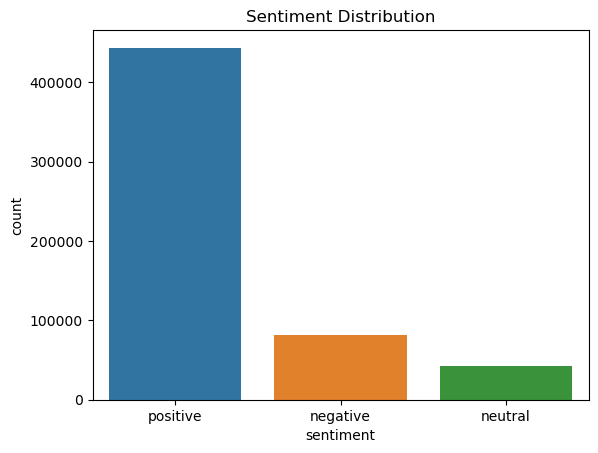

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [7]:
import re
import string
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS

In [8]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

C:\Users\shah4\AppData\Local\Temp\ipykernel_9828\681295741.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])  # 'negative'→0, 'neutral'→1, 'positive'→2

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.863480838412891
              precision    recall  f1-score   support

    negative       0.73      0.66      0.69     16407
     neutral       0.52      0.17      0.26      8528
    positive       0.89      0.97      0.93     88756

    accuracy                           0.86    113691
   macro avg       0.71      0.60      0.63    113691
weighted avg       0.84      0.86      0.84    113691



In [12]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print("NB Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred, target_names=le.classes_))

NB Accuracy: 0.8160804285299628
              precision    recall  f1-score   support

    negative       0.82      0.27      0.41     16407
     neutral       0.61      0.00      0.01      8528
    positive       0.82      0.99      0.90     88756

    accuracy                           0.82    113691
   macro avg       0.75      0.42      0.44    113691
weighted avg       0.80      0.82      0.76    113691

